In [7]:
from src.train import train

train(input_to_softmax=model, model_name=model_name, spectrogram=False, epochs=2)

Epoch 1/20
467/467 [==============================] - 3003s 6s/step - loss: 257.8258 - val_loss: 255.0784
Epoch 2/20
467/467 [==============================] - 3043s 7s/step - loss: 198.9984 - val_loss: 237.4384
Epoch 3/20
467/467 [==============================] - 3084s 7s/step - loss: 189.7968 - val_loss: 218.9426
Epoch 4/20
467/467 [==============================] - 3071s 7s/step - loss: 152.8838 - val_loss: 175.9336
Epoch 5/20
467/467 [==============================] - 3085s 7s/step - loss: 129.6943 - val_loss: 154.0352
Epoch 6/20
467/467 [==============================] - 3074s 7s/step - loss: 117.7387 - val_loss: 149.7847
Epoch 7/20
467/467 [==============================] - 3074s 7s/step - loss: 108.8953 - val_loss: 138.7086
Epoch 8/20
467/467 [==============================] - 3106s 7s/step - loss: 101.2720 - val_loss: 131.9990
Epoch 9/20
467/467 [==============================] - 3072s 7s/step - loss: 95.4478 - val_loss: 125.5078
Epoch 10/20
467/467 [==========================

In [2]:
from src.char_map import char_map, index_map
from src.models import model_1

model = model_1(input_dim=13,
                units=400,
                activation='relu',
                output_dim=len(char_map)+1)
model_name = "model_1"

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
rnn (GRU)                    (None, None, 400)         496800    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 400)         1600      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 224)         89824     
_________________________________________________________________
softmax (Activation)         (None, None, 224)         0         
Total params: 588,224
Trainable params: 587,424
Non-trainable params: 800
_________________________________________________________________
None


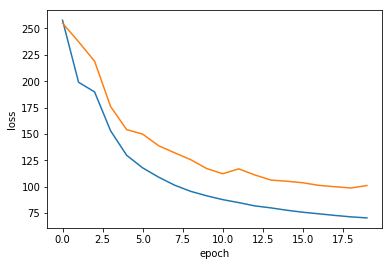

In [4]:
from src.plot import plot_hist

model_name = "model_1"
plot_hist(model_name)

In [5]:
from src.data_generator import data_gen
from src.data_generator import VALID_LENGTH
from src.predict import predict
import time
import pickle

def get_wer():
    start = time.time()
    def wer_single(i):
        wer = predict(i, 'validation', model, verbose=False)
        if (i%10==0) and i>0:
            print("processed %d in %d minutes" % (i, ((time.time() - start)/60)))
        return wer
    wer = list(map(lambda i: wer_single(i), range(0, VALID_LENGTH)))
    print("Total time: %f" % ((time.time() - start)/60))
    return wer

wer = get_wer()

with open('models/' + model_name + '_wer.pickle', 'wb') as handle:
    pickle.dump(wer, handle)

wer: 90
wer: 199
wer: 226
wer: 204
wer: 49


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pickle
from src.predict import predict

predict(0, 'train', model)
predict(1, 'train', model)
predict(2, 'train', model)
predict(3, 'train', model)
predict(4, 'train', model)
predict(5, 'train', model)
predict(6, 'train', model)
predict(7, 'train', model)
predict(8, 'train', model)
predict(9, 'train', model)

In [ ]:
import numpy as np
import pickle
from src.predict import predict

wer = pickle.load(open('models/' + model_name + '_wer.pickle', "rb" ))
wer_index = np.argsort(wer)
predict(wer_index[0], 'validation', model)
predict(wer_index[1], 'validation', model)
predict(wer_index[2], 'validation', model)
predict(wer_index[3], 'validation', model)
predict(wer_index[4], 'validation', model)
predict(wer_index[5], 'validation', model)
predict(wer_index[-1], 'validation', model)
predict(wer_index[-2], 'validation', model)
predict(wer_index[-3], 'validation', model)
predict(wer_index[-4], 'validation', model)
predict(wer_index[-5], 'validation', model)
predict(wer_index[-6], 'validation', model)